# Candlestick On-Neck

https://www.investopedia.com/terms/n/neck-pattern.asp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2016-01-01'
end = '2021-10-08'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,2.77,2.82,2.63,2.77,2.77,32516800
2016-01-05,2.77,2.80,2.64,2.75,2.75,12972300
2016-01-06,2.66,2.71,2.47,2.51,2.51,23759400
2016-01-07,2.43,2.48,2.26,2.28,2.28,22203500
2016-01-08,2.36,2.42,2.10,2.14,2.14,31822400


## Candlestick with In-Neck

In [3]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,VolumePositive
0,735967.0,2.77,2.82,2.63,2.77,2.77,32516800,False
1,735968.0,2.77,2.80,2.64,2.75,2.75,12972300,False
2,735969.0,2.66,2.71,2.47,2.51,2.51,23759400,False
3,735970.0,2.43,2.48,2.26,2.28,2.28,22203500,False
4,735971.0,2.36,2.42,2.10,2.14,2.14,31822400,False


Text(0, 0.5, 'Price')

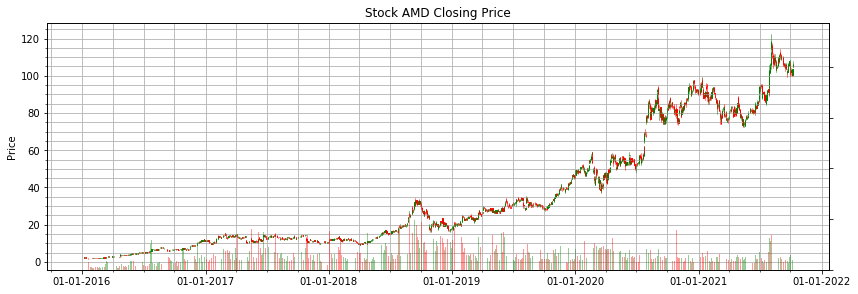

In [4]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

In [5]:
on_neck = talib.CDLONNECK(df['Open'], df['High'], df['Low'], df['Close'])

on_neck = on_neck[on_neck != 0]

In [6]:
df['on_neck'] = talib.CDLONNECK(df['Open'], df['High'], df['Low'], df['Close'])

In [7]:
df.loc[df['on_neck'] !=0]

,Open,High,Low,Close,Adj Close,Volume,on_neck
Date,,,,,,,
2017-08-29,12.000000,12.180000,11.930000,12.150000,12.150000,33618100,-100
2017-09-22,13.200000,13.400000,13.120000,13.300000,13.300000,50547000,-100
2020-09-17,74.879997,76.629997,74.199997,76.550003,76.550003,55619100,-100
2021-05-04,77.949997,78.669998,77.040001,78.610001,78.610001,59194300,-100


In [8]:
df['Adj Close'].loc[df['on_neck'] !=0]

Date
2017-08-29    12.150000
2017-09-22    13.300000
2020-09-17    76.550003
2021-05-04    78.610001
Name: Adj Close, dtype: float64

In [9]:
df['Adj Close'].loc[df['on_neck'] !=0].index

DatetimeIndex(['2017-08-29', '2017-09-22', '2020-09-17', '2021-05-04'], dtype='datetime64[ns]', name='Date', freq=None)

In [10]:
on_neck

Date
2017-08-29   -100
2017-09-22   -100
2020-09-17   -100
2021-05-04   -100
dtype: int32

In [11]:
on_neck.index

DatetimeIndex(['2017-08-29', '2017-09-22', '2020-09-17', '2021-05-04'], dtype='datetime64[ns]', name='Date', freq=None)

In [12]:
df

,Open,High,Low,Close,Adj Close,Volume,on_neck
Date,,,,,,,
2016-01-04,2.770000,2.820000,2.630000,2.770000,2.770000,32516800,0
2016-01-05,2.770000,2.800000,2.640000,2.750000,2.750000,12972300,0
2016-01-06,2.660000,2.710000,2.470000,2.510000,2.510000,23759400,0
2016-01-07,2.430000,2.480000,2.260000,2.280000,2.280000,22203500,0
2016-01-08,2.360000,2.420000,2.100000,2.140000,2.140000,31822400,0
...,...,...,...,...,...,...,...
2021-10-01,102.599998,103.000000,100.639999,102.449997,102.449997,41491600,0
2021-10-04,101.739998,101.849998,99.820000,100.339996,100.339996,41967100,0
2021-10-05,100.919998,102.870003,100.610001,101.809998,101.809998,31455200,0


Text(0, 0.5, 'Price')

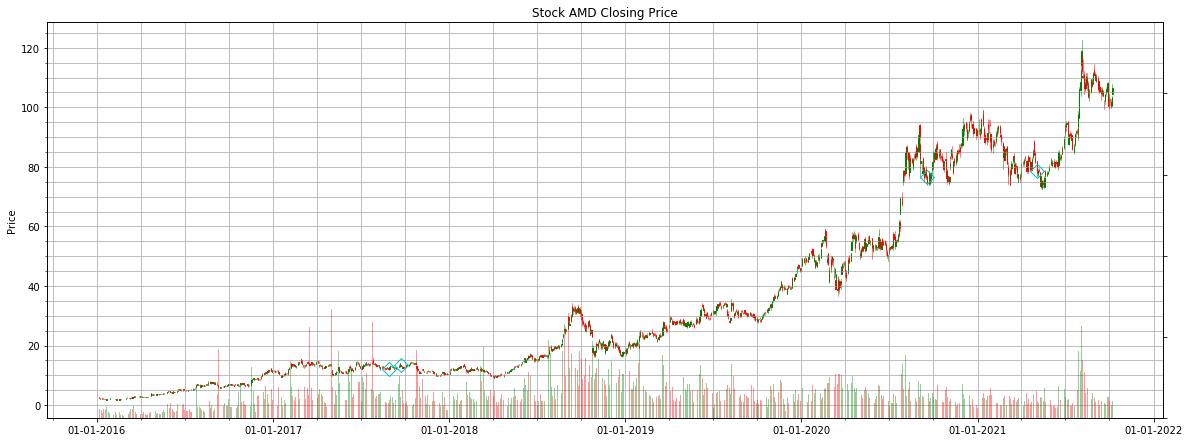

In [13]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['on_neck'] !=0].index, df['Adj Close'].loc[df['on_neck'] !=0],
                'Dc', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=10.0) 
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

## Plot Certain dates

In [14]:
df = df['2021-05-01':'2021-06-01']
dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,on_neck,VolumePositive
0,737913.0,81.970001,82.000000,78.459999,78.550003,78.550003,66323300,0,False
1,737914.0,77.949997,78.669998,77.040001,78.610001,78.610001,59194300,-100,True
2,737915.0,79.050003,79.300003,77.360001,77.830002,77.830002,42310200,0,False
3,737916.0,77.629997,78.059998,76.470001,77.889999,77.889999,38661300,0,True
4,737917.0,78.750000,79.570000,78.220001,78.809998,78.809998,36954200,0,True


Text(0, 0.5, 'Price')

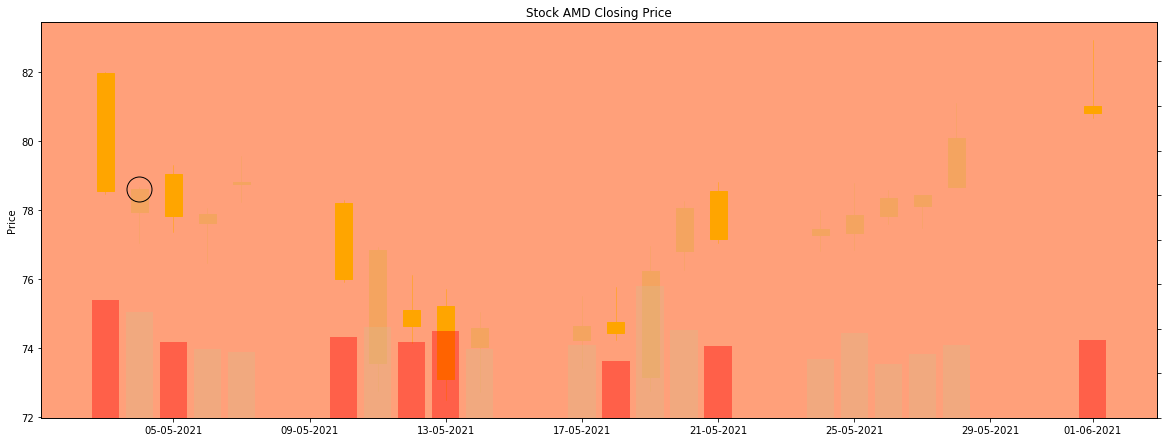

In [15]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
ax.set_facecolor('lightsalmon')
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='sandybrown', colordown='orange', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['on_neck'] !=0].index, df['Adj Close'].loc[df['on_neck'] !=0],
                'ok', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=25.0) 
colors = dfc.VolumePositive.map({True: 'burlywood', False: 'red'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

# Highlight Candlestick

Text(0, 0.5, 'Price')

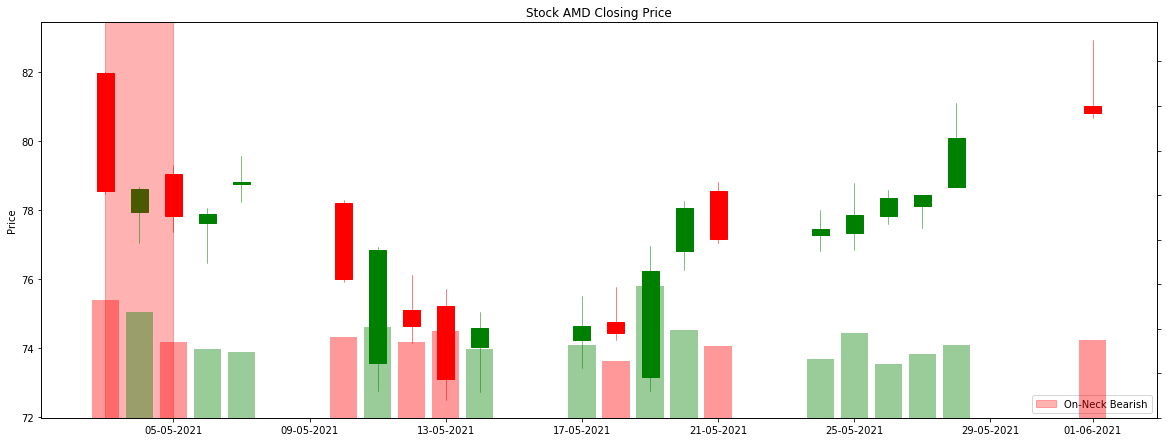

In [16]:
from matplotlib.dates import date2num
from datetime import datetime

fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.axvspan(date2num(datetime(2021,5,3)), date2num(datetime(2021,5,5)), 
           label="On-Neck Bearish",color="red", alpha=0.3)
ax.legend()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')